# # Gabriel Sultan Lab3 - individiual work

# #Exercice 1

In [1]:
import pandas as pd
import numpy as np
import os

wine_data = pd.read_csv('../../data/winequality-white.csv', sep=';')

print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [2]:
df_wine = pd.DataFrame(data=wine_data.values, columns=wine_data.columns)

print(df_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8      6.0  
1      9.5      6.0  
2     10.1      6.0 

In [3]:
#missing values ?

print(df_wine.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
X = df_wine.drop('quality', axis=1) #we drop this colone because this is target variable
Y = df_wine['quality'].copy()


In [5]:
from sklearn.model_selection import train_test_split

#we split the data (70/30)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)



the random_state is a seed that garante us to get the same results at every executions
in other words, if we split several times our dataset without this seed, we would have a different training and test set every time.

In [6]:
#scaling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# here we have a linear regression problem because 
# we are predicting numerical values in N contained between 1 and 10.

modele_regression = LinearRegression()

modele_regression.fit(X_train_scaled, y_train)

y_pred = modele_regression.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE : {mse:.4f}")
print(f"R2: {r2:.4f}")


MSE : 0.6028
R2: 0.2679


We see here that the resulats are pretty bad with a high MSE and a low R2 score, meaning the actual model only explains 26% of the problem.

# #Exercice 2

# MSE formula:
mse = np.mean((y_test - y_pred)**2)
basically the error between pred values and actual values to predict, squared to avoid negative error values 


In [8]:
def LR_Pipeline(scaler):
    
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression

    my_pipeline = Pipeline([
        ('scaling', scaler),
        ('regression', LinearRegression())
    ])
    return my_pipeline



In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#define the 2 scalers to test
scalers = {
    "min-max": MinMaxScaler(),
    "standard": StandardScaler()
}

# define test size to test
test_sizes = [0.1, 0.2]

results = []

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for scaler_name, scaler in scalers.items():
    for test_size in test_sizes:
        # Séparer les données
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=test_size, random_state=20
        )
        
        pipeline = LR_Pipeline(scaler)#create the pipeline
        pipeline.fit(X_train, y_train)#train the model
        y_pred = pipeline.predict(X_test)#predict it
        mse = mean_squared_error(y_test, y_pred)#calculate the mse
        r2 = r2_score(y_test, y_pred)#calculate the r2 score
        results.append({
            "scaler": scaler_name,
            "test_size": test_size,
            "MSE": mse,
            "R2": r2
        })
        print(f"Scaler: {scaler_name}, test_size: {test_size} => MSE: {mse:.4f}, R2: {r2:.4f}")


Scaler: min-max, test_size: 0.1 => MSE: 0.6416, R2: 0.2528
Scaler: min-max, test_size: 0.2 => MSE: 0.6207, R2: 0.2587
Scaler: standard, test_size: 0.1 => MSE: 0.6416, R2: 0.2528
Scaler: standard, test_size: 0.2 => MSE: 0.6207, R2: 0.2587


#we see there is not much changing in the results as the mse and R2 doesnt change a lot

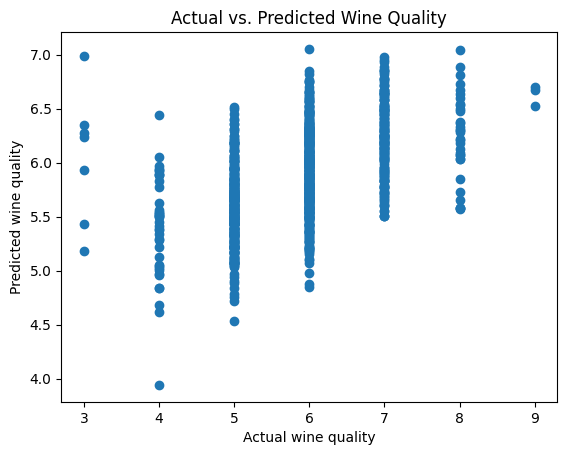

In [10]:
#best configuration (based on R2)
best_result = max(results, key=lambda x: x["R2"])
best_scaler = scalers[best_result["scaler"]]
best_test_size = best_result["test_size"]

# Split the data again with the best configuration
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=best_test_size, random_state=20
)

# Retrain the pipeline with the best configuration
pipeline = LR_Pipeline(best_scaler)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

import matplotlib.pyplot as plt

# visualisation 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual wine quality")
plt.ylabel("Predicted wine quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()


In [11]:
# accessing model parameters
predictor = list(pipeline.named_steps.values())[-1]
coefficients = predictor.coef_
intercept = predictor.intercept_

# Displaying the estimated parameter values
print("Estimated parameter values (B):")
for i, coef in enumerate(coefficients, 1):
    print(f"θ{i} = {coef}")

print(f"Intercept (B0): {intercept}")

# Writing the exact formula of the predictor
features = X.columns if hasattr(X, 'columns') else [f"x{i}" for i in range(1, len(coefficients)+1)]
formula = " + ".join([f"({coef:.4f} * {feature})" for coef, feature in zip(coefficients, features)])
full_formula = f"y = {intercept:.4f} + {formula}"
print(full_formula)


Estimated parameter values (B):
θ1 = 0.03824966939716775
θ2 = -0.1809646001253037
θ3 = 0.0010730831239626273
θ4 = 0.390747532258596
θ5 = -0.008380170392548328
θ6 = 0.0790809593955837
θ7 = -0.027391935085467847
θ8 = -0.3981574029536617
θ9 = 0.09339980654244688
θ10 = 0.06027215495294206
θ11 = 0.26270551311980356
Intercept (B0): 5.889994895354774
y = 5.8900 + (0.0382 * fixed acidity) + (-0.1810 * volatile acidity) + (0.0011 * citric acid) + (0.3907 * residual sugar) + (-0.0084 * chlorides) + (0.0791 * free sulfur dioxide) + (-0.0274 * total sulfur dioxide) + (-0.3982 * density) + (0.0934 * pH) + (0.0603 * sulphates) + (0.2627 * alcohol)


In [12]:

# Create a scaler for Y
y_scaler = StandardScaler()
Y_norm = y_scaler.fit_transform(Y.values.reshape(-1, 1)).flatten()

# New train-test split using the best configuration found previously
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X, Y_norm, test_size=best_test_size, random_state=20)

# Retrain the pipeline with the normalized target
pipeline_norm = LR_Pipeline(best_scaler)
pipeline_norm.fit(X_train_n, y_train_n)
y_pred_n = pipeline_norm.predict(X_test_n)

# Inverse the normalization to get predictions back to the original scale
y_pred_n_inv = y_scaler.inverse_transform(y_pred_n.reshape(-1, 1)).flatten()
y_test_n_inv = y_scaler.inverse_transform(y_test_n.reshape(-1, 1)).flatten()

def compute_mse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(y_true, y_pred)

print("Results without Y normalization")
print(f"R2 : {r2_score(y_test, y_pred):.4f}")
print(f"MSE : {compute_mse(y_test, y_pred):.4f}")

print("\nResults with Y normalization ")
print(f"R2 : {r2_score(y_test_n_inv, y_pred_n_inv):.4f}")
print(f"MSE : {compute_mse(y_test_n_inv, y_pred_n_inv):.4f}")


Results without Y normalization
R2 : 0.2587
MSE : 0.6207

Results with Y normalization 
R2 : 0.2587
MSE : 0.6207


Normalizing the target variable did not have an impact on the results here as the R2 and MSE values are the same.
And thats's beacause normalizing Y simply change its scale, but does not affect the model's ability to fit or predict the data.


# #Exercice 3


In [13]:
y_binary = (df_wine['quality'] >= 5).astype(int) #changing to a binary classifiaction problem


In [14]:
from sklearn.pipeline import Pipeline  

def Reg_Pipeline(scaler, model):
    
    my_pipeline = Pipeline([
        ('scaler', scaler),
        ('regressor', model)
    ])
    return my_pipeline


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_binary, test_size=0.3, random_state=20, stratify=y_binary)


#create pipeline
pipeline_clf = Reg_Pipeline(StandardScaler(), LogisticRegression())

# traing with the pipeline 
pipeline_clf.fit(X_train_clf, y_train_clf)

#predicted on the training set 
y_pred_train_clf = pipeline_clf.predict(X_train_clf)



In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Redéfinir y_pred_test_clf
y_pred_test_clf = pipeline_clf.predict(X_test_clf)

# metrics
accuracy = accuracy_score(y_test_clf, y_pred_test_clf)
confusion = confusion_matrix(y_test_clf, y_pred_test_clf)
classification_rep = classification_report(y_test_clf, y_pred_test_clf)

print(f"Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:")
print(confusion)
print(f"\nClassification Report:")
print(classification_rep)


Accuracy: 0.9646

Confusion Matrix:
[[   4   51]
 [   1 1414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.07      0.13        55
           1       0.97      1.00      0.98      1415

    accuracy                           0.96      1470
   macro avg       0.88      0.54      0.56      1470
weighted avg       0.96      0.96      0.95      1470



In [17]:
import numpy as np

n_zeros = np.sum(y_train_clf == 0)
n_ones = np.sum(y_train_clf == 1)
total = len(y_train_clf)

print(f"Number of class 0 samples: {n_zeros} ({n_zeros/total:.2%})")
print(f"Number of class 1 samples: {n_ones} ({n_ones/total:.2%})")


Number of class 0 samples: 128 (3.73%)
Number of class 1 samples: 3300 (96.27%)


We can cleary see that most of the data training set is composed of class 1 samples (most wines are good, 96%) = imbalanced dataset.
So we should aslo be aware and look at others metrcis like recall or f1 score.


# #Exercice 4


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with the GaussianNB model
pipeline_nb = Pipeline([
    ('preprocessor', StandardScaler()),
    ('classifier', GaussianNB())
])

# Train the model on the training set
pipeline_nb.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred_nb = pipeline_nb.predict(X_test_clf)

# Calculate metrics
conf_matrix_nb = confusion_matrix(y_test_clf, y_pred_nb)
precision_nb = precision_score(y_test_clf, y_pred_nb)
recall_nb = recall_score(y_test_clf, y_pred_nb)
f1_nb = f1_score(y_test_clf, y_pred_nb)
accuracy_nb = accuracy_score(y_test_clf, y_pred_nb)

print("Confusion matrix (Naive Bayes):")
print(conf_matrix_nb)
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")
print(f"Accuracy: {accuracy_nb:.4f}")


Confusion matrix (Naive Bayes):
[[  20   35]
 [  42 1373]]
Precision: 0.9751
Recall: 0.9703
F1-score: 0.9727
Accuracy: 0.9476


6. This method slightly improved our model, with better metrics

# #Exercice 5


1. To compare Naive Bayes and logistic regression, evaluate both on the same dataset using metrics like accuracy, precision...
Also important to note that logistic regression is more interpretable


In [19]:
#comparing auc roc score
from sklearn.metrics import roc_auc_score

# pred for each model
y_proba_nb = pipeline_nb.predict_proba(X_test_clf)[:, 1]
y_proba_lr = pipeline_clf.predict_proba(X_test_clf)[:, 1]

# calculate the auc-roc
auc_nb = roc_auc_score(y_test_clf, y_proba_nb)
auc_lr = roc_auc_score(y_test_clf, y_proba_lr)

print(f"AUC-ROC Naive Bayes : {auc_nb:.4f}")
print(f"AUC-ROC Régression Logistique : {auc_lr:.4f}")


AUC-ROC Naive Bayes : 0.8144
AUC-ROC Régression Logistique : 0.7675


Naive Bayes has a better AUC-ROC score, so he performed better and may be the model we would have choosed in a real situation even though he is less interpretable.